# Degree Heating Weeks

The NOAA Coral Reef Watch (CRW) daily global 5km satellite coral bleaching Degree Heating Week (DHW) product for the virtual station in the vicinity of Palau shows accumulated heat stress, which can lead to coral bleaching and death (Figure 15). Bleaching heat stress is categorized into risk levels based on the DHW values, which are directly related to the timing and intensity of coral bleaching – Bleaching Warning (0 < DHW < 4), Bleaching Alert Level 1 (4 <= DHW < 8), and (8 <= DHW < 12).  At Bleaching Alert Level 1, significant bleaching is expected within a few weeks of the alert. At Bleaching Alert Level 2 and above, severe, widespread bleaching and significant coral mortality are likely.  

https://coralreefwatch.noaa.gov/product/5km/methodology.php#dhw

In [1]:
import sys
import os
import os.path as op

import xarray as xr
import plotly.express as px
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting import plot_dhw, plot_dhw_perpetual_year


## Setup

Define area of interest

In [2]:
path_data = 'sst_daily_1981_2024_palau.nc'
path_figs = "../../../matrix_cc/figures"

lon_site, lat_site = 134.368203, 7.322074

#Area of interest
lon_range  = [129.4088, 137.0541]
lat_range = [1.5214, 11.6587]

EEZ shapefile

In [3]:
shp_f = op.join(os.getcwd(), '..', '..','..', 'data/Palau_EEZ/pw_eez_pol_april2022.shp')
shp_eez = gpd.read_file(shp_f)

### Download Data

In [4]:
'''
Name:
Palau
Polygon Middle Longitude:
134.4250 
Polygon Middle Latitude:
7.6750  
Averaged Maximum Monthly Mean:
29.2309
Averaged Monthly Mean (Jan-Dec):
28.0424 27.7264 27.8581 28.4679 29.1780 29.2309 28.8550 28.7810 28.8377 29.0823 29.1088 28.8078
First Valid DHW Date:
1985 25 03
First Valid BAA Date:
1985 31 03
'''
data_crw = pd.read_csv('https://coralreefwatch.noaa.gov/product/vs/data/palau.txt', sep=r'\s+', skiprows=20)
data_crw.to_csv('data_crw_palau.csv')
data_crw.index = pd.to_datetime(data_crw['YYYY'].astype(str) + data_crw['MM'].astype(str)+ data_crw['DD'].astype(str), format = '%Y%m%d')
data_crw = data_crw.groupby(level=0).max()
# data_crw = data_crw[~data_crw.index.duplicated()]
data_crw.sort_index(inplace = True)
# data_crw = data_crw.resample('W').mean()
data_crw = data_crw[:'2024']


## Analysis


Stress Level <br>

No Stress HotSpot <= 0 <br>
Bleaching Watch 0 < HotSpot < 1 <br>
Bleaching Warning 1 <= HotSpot and 0 < DHW < 4 <br>
Bleaching Alert Level 1 1 <= HotSpot and 4 <= DHW < 8 <br>
Bleaching Alert Level 2	1 <= HotSpot and 8 <= DHW <br>


#### Full time period

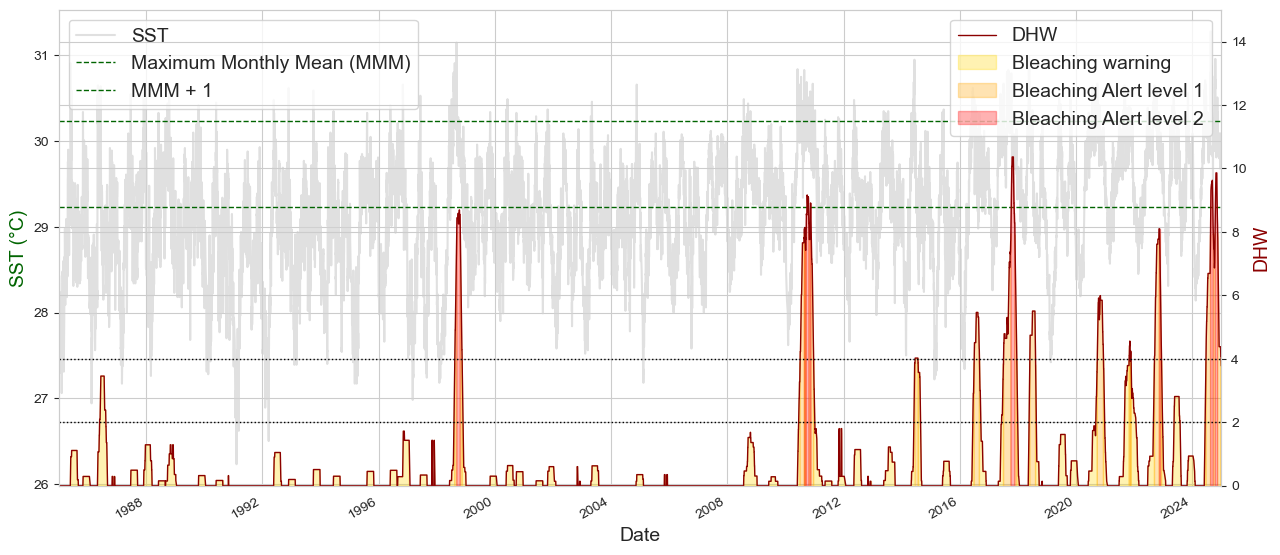

In [5]:
fig, ax2 = plot_dhw(data_crw)
plt.savefig(op.join(path_figs, 'F13_DHW.png'), dpi=300, bbox_inches='tight')

#### Last 10 years

(np.float64(16071.0), np.float64(19723.0))

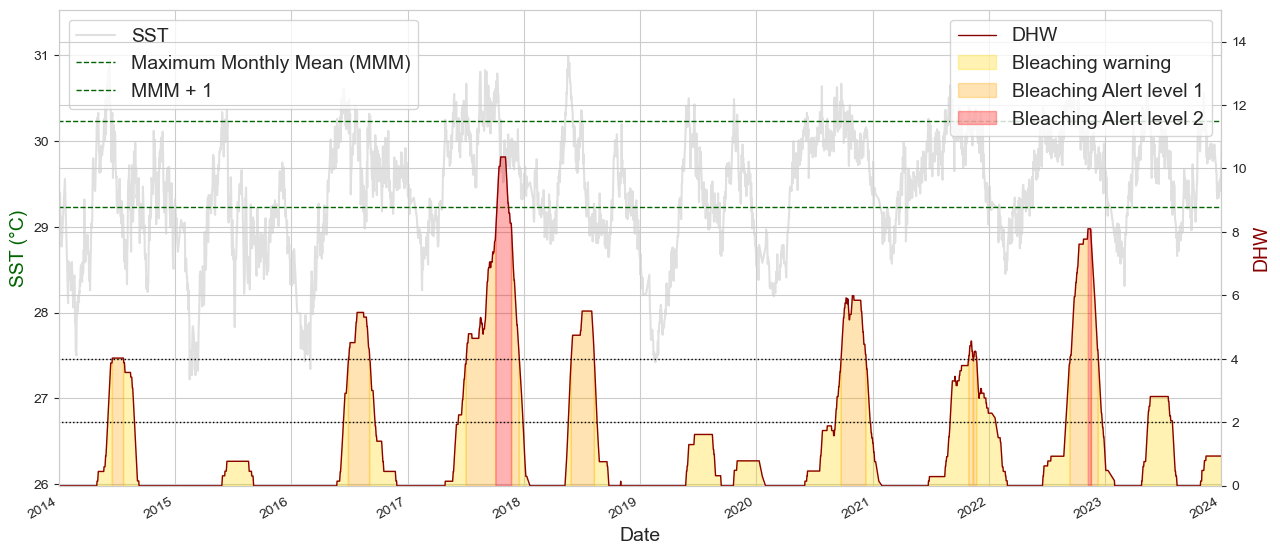

In [6]:
fig, ax2 = plot_dhw(data_crw)
ax2.set_xlim('2014', '2024')

#### Perpetual Year

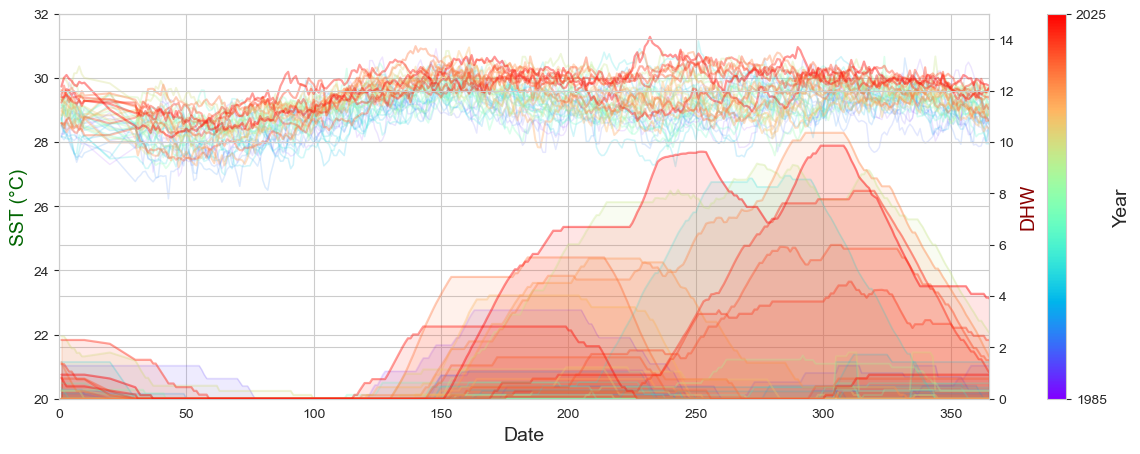

In [7]:
fig, ax2 = plot_dhw_perpetual_year(data_crw, yeari = 1985, yeare = 2025)